In [1]:
import os
os.chdir("..")

In [2]:
from shell.datasets.datasets import MNIST, FashionMNIST, KMNIST, CIFAR100
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import torch

In [3]:
num_train = 64

dataCls = [MNIST, FashionMNIST, KMNIST, CIFAR100]
datasets = [cls(num_train=num_train) for cls in dataCls]

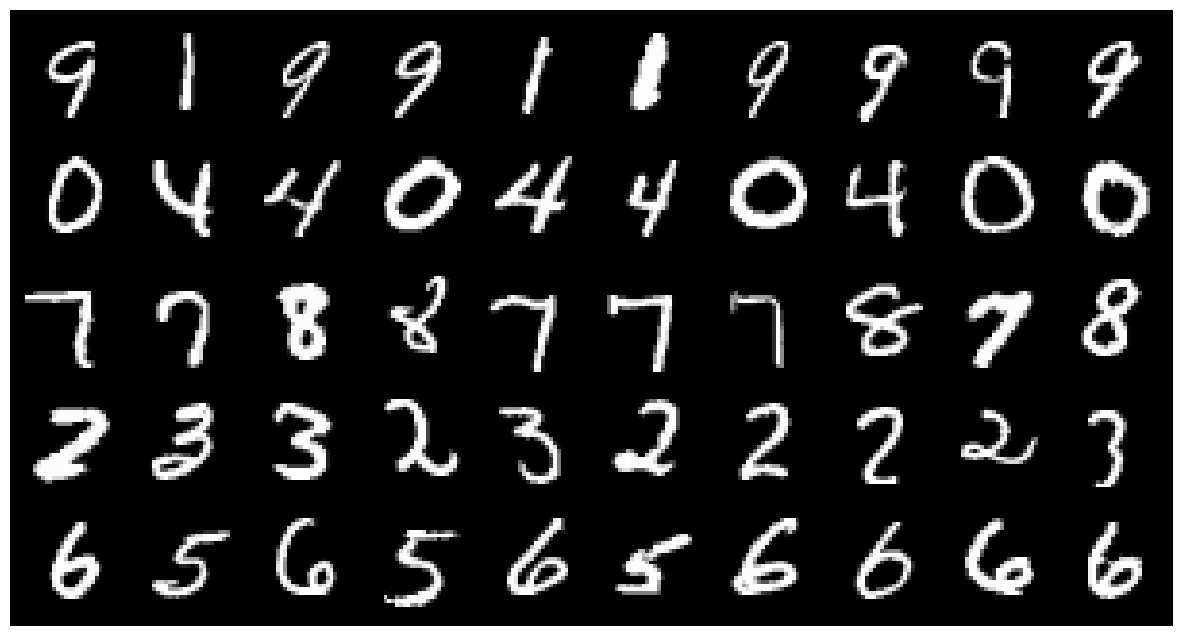

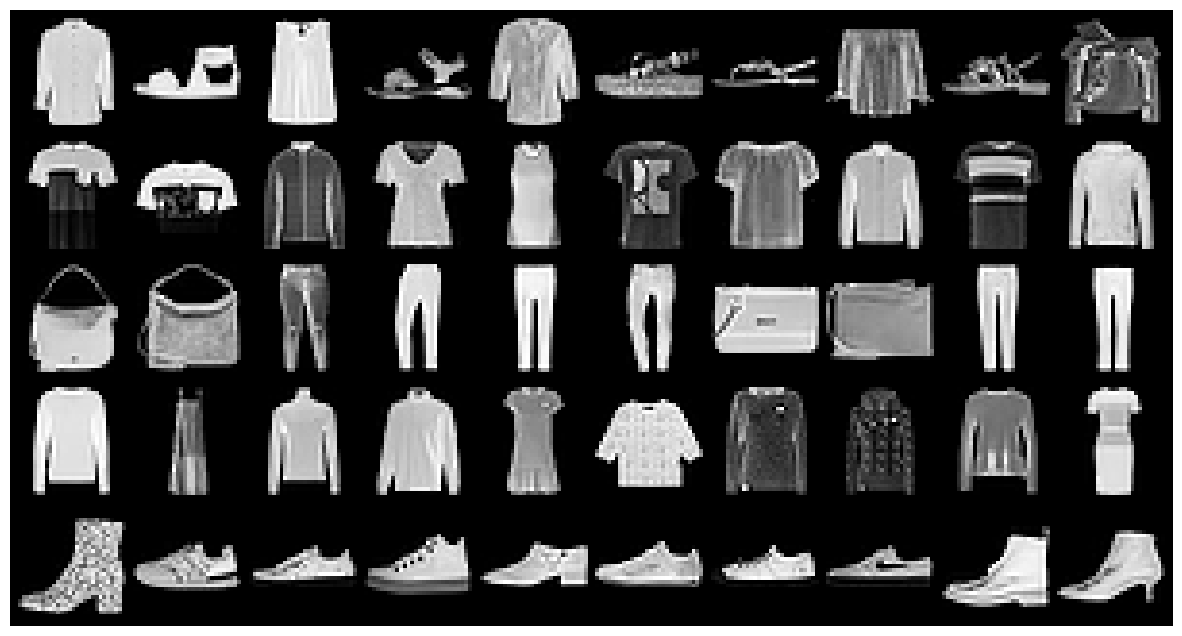

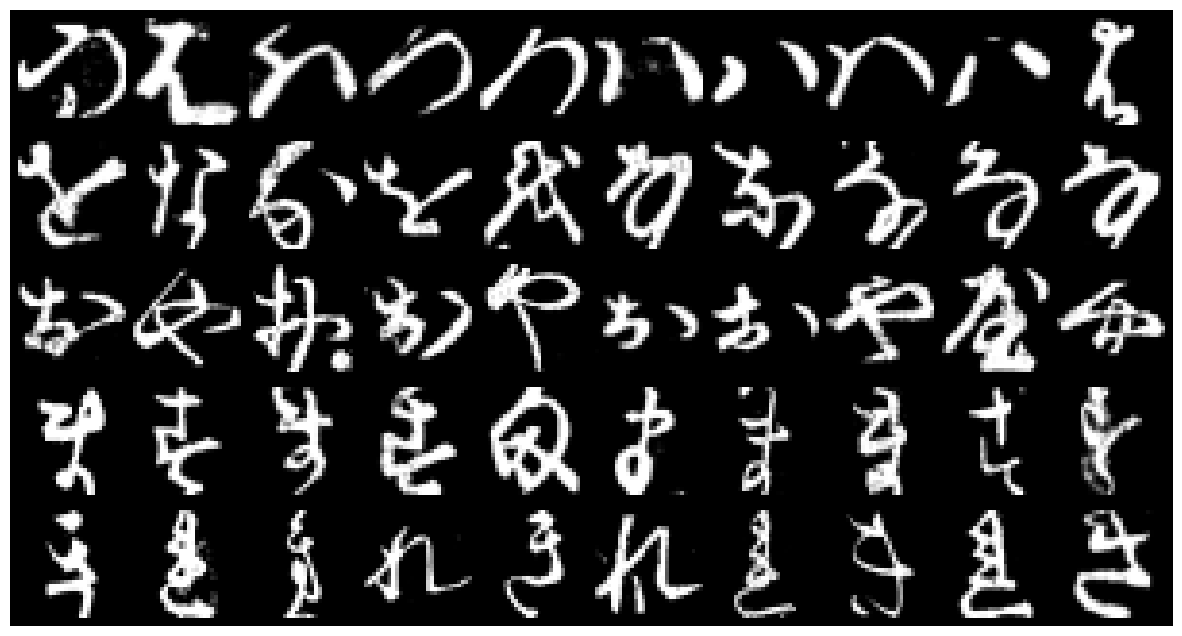

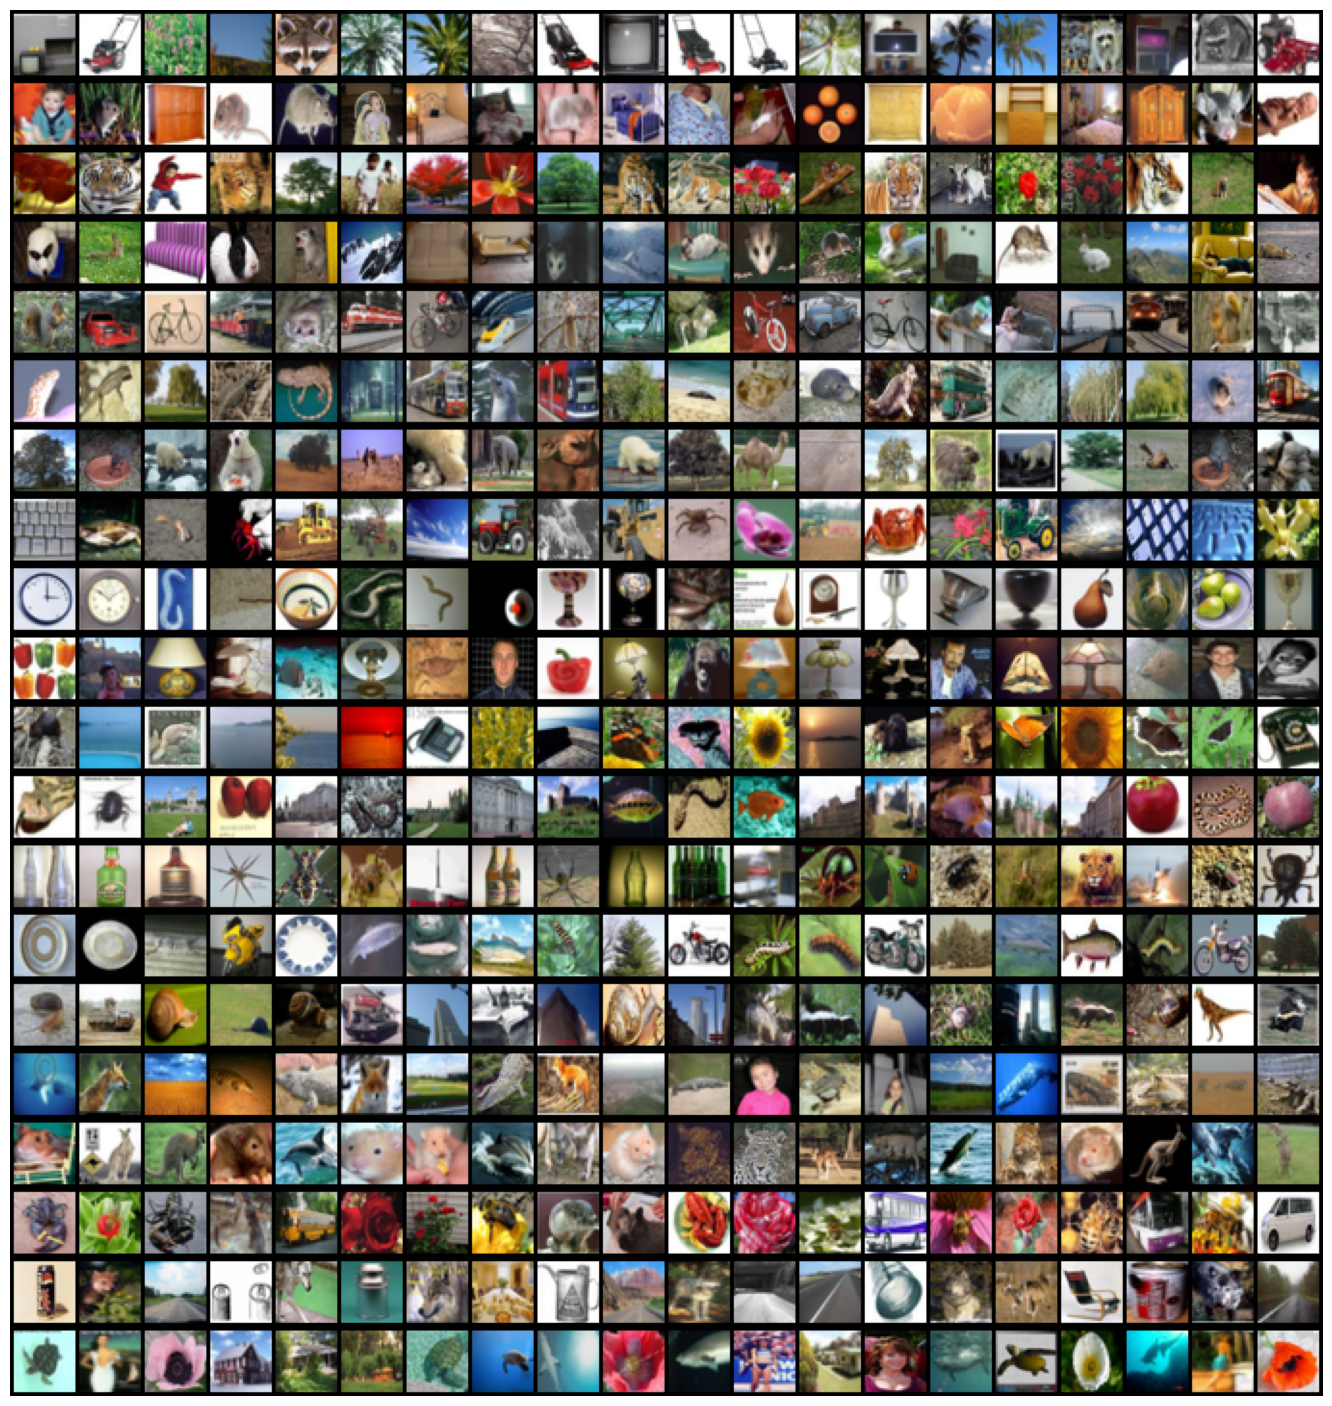

In [5]:
for dataset in datasets:
    num_tasks = len(dataset.trainset)
    n_images_per_task = 20 if dataset.name == "cifar100" else 10
    X_tasks = []
    for task in range(num_tasks):
        tensordataset = dataset.trainset[task]
        X = tensordataset.tensors[0]
        y = tensordataset.tensors[1]
        X = X[:n_images_per_task]
        y = y[:n_images_per_task]
        X_task = make_grid(X, nrow=n_images_per_task)
        X_tasks.append(X_task)
    X = torch.cat(X_tasks, dim=1)

    plt.figure(figsize=(20, 18 if dataset.name == "cifar100" else 8))
    plt.imshow(X.permute(1, 2, 0))
    plt.axis("off")
    # save image at Figures/datasets/dataset.name
    plt.savefig(f"Figures/datasets/{dataset.name}.pdf", bbox_inches="tight")